In [1]:
__depends__ = ["../results/human.csv"]
__dest__ = ["../results/human_averages.csv", "../figures/human_averages.pdf"]

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import util
np.random.seed(1)

In [3]:
# Load in the data
data = pd.read_csv(__depends__[0])
data.head()

,participant,stimulus,rt,timestamp,trial,x,y
0,0,0,712.311705,2016-07-12 11:37:56.981191,33,0.000000,0.033065
1,0,1,494.589488,2016-07-12 11:37:56.981200,4,0.028571,0.004840
2,0,2,431.101076,2016-07-12 11:37:56.981202,12,0.057143,0.006987
3,0,3,606.345633,2016-07-12 11:37:56.981204,15,0.085714,0.005401
4,0,4,919.631913,2016-07-12 11:37:56.981205,24,0.114286,0.047801


In [4]:
means = data.groupby(["stimulus", "x"])["y"].apply(util.bootmean).unstack().reset_index("x")
means.to_csv(__dest__[0])
means.head()

,x,lower,median,upper,mean,lerr,uerr
stimulus,,,,,,,
0,0.000000,0.008356,0.011539,0.015389,0.011696,0.003340,0.003694
1,0.028571,0.009862,0.012827,0.016178,0.012913,0.003051,0.003265
2,0.057143,0.014842,0.018581,0.023324,0.018709,0.003866,0.004616
3,0.085714,0.020169,0.026024,0.033465,0.026261,0.006093,0.007204
4,0.114286,0.027964,0.035505,0.045211,0.035916,0.007953,0.009295


In [5]:
corrs = util.bootcorr(means["x"], means["mean"])
corrs.head()

lower     0.972983
median    0.980742
upper     0.986749
corr      0.980247
dtype: float64

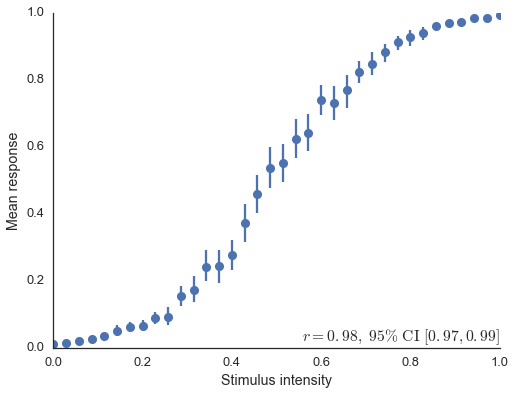

In [6]:
sns.set_style("white")
sns.set_context("talk")
fig, ax = plt.subplots()
ax.errorbar(means["x"], means["mean"], yerr=[means["lerr"], means["uerr"]], marker='o', linestyle='')
ax.set_xlabel("Stimulus intensity")
ax.set_ylabel("Mean response")
corrstr = r"$r={corr:.2f},\ 95\%\ \mathrm{{CI}}\ [{lower:.2f}, {upper:.2f}]$".format(**corrs)
ax.text(1, 0.02, corrstr, horizontalalignment='right')
sns.despine()
fig.set_size_inches(8, 6)
plt.savefig(__dest__[1])